# TAHOPE_CWB_data_demonstration


*The below demonstrates the elegent way to acess CWB data in TAIHOPE project through python-based tools( i.e. cwbplot module)*

*For more detail information, please see:https://cwbplot.readthedocs.io/en/dev/ (under construction)*

In [1]:
##import CWB developed module
import cwbplot.IO_tools as IO

In [2]:
##import python utility module 
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# MSC satellite data 

In [3]:
#1. Given MSC data file path, no need for untar.
file_twn='DATA/MSC_SAT/2022-03-21_0900.TAIWAN_NWP.VIS.1350.tar.gz'
file_asia='DATA/MSC_SAT/2022-03-21_0900.EASTASIA_NWP.IR1.2750.tar.gz'
#2 Using MSC_READ function and get data object, the info shows data contain albedo(alb), 
#   grayscale value(cnt), and brightnes temperature(btp)
taiwan_obj=IO.MSC_READ(file_twn)
asia_obj = IO.MSC_READ(file_asia)
#3 all data info are in this structured object

<TarInfo '2022-03-21_0900.TAIWAN_NWP.VIS.1350.alb' at 0x7fe9999684f8>
<TarInfo '2022-03-21_0900.TAIWAN_NWP.VIS.1350.Cnt' at 0x7fe9999685c0>
<TarInfo '2022-03-21_0900.EASTASIA_NWP.IR1.2750.btp' at 0x7fe9999685c0>
<TarInfo '2022-03-21_0900.EASTASIA_NWP.IR1.2750.Cnt' at 0x7fe9999684f8>


In [4]:
## Projection for TAWINAN AREA
bm_twn = Basemap(projection='tmerc', resolution='i',lat_0=23.7,lon_0=121.0,\
            llcrnrlon=116.1417,llcrnrlat=19.0295,urcrnrlon=126.2109,urcrnrlat=28.2065)

## Projection for EASTASIA
bm_asia = Basemap(projection='lcc', resolution='i',\
            lat_1=30.,lat_2=60.,lat_0=0,lon_0=128.5,\
            llcrnrlon=102.111,llcrnrlat=-1.503,\
             urcrnrlon=155.270,urcrnrlat= 48.589)


Text(0.5, 1.0, 'TAIWAN AREA ALEBDO for VIS BAND AT 0900 LST')

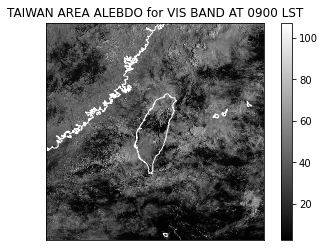

In [5]:
bm_twn.pcolormesh(taiwan_obj.lon ,taiwan_obj.lat,taiwan_obj.data['VIS_ALB'],cmap='binary_r',latlon=True)
bm_twn.drawcoastlines(color='w')
plt.colorbar()
plt.title('TAIWAN AREA ALEBDO for VIS BAND AT 0900 LST')

Text(0.5, 1.0, 'EASTASIA AREA Bnt for IR BAND AT 0900 LST')

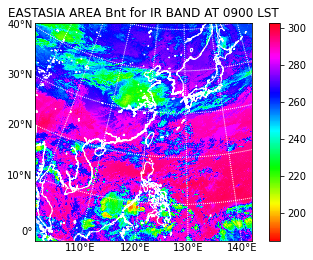

In [6]:
bm_asia.pcolormesh(asia_obj.lon ,asia_obj.lat,asia_obj.data['IR1_BTP'],cmap='hsv',latlon=True)
bm_asia.drawcoastlines(color='w') 
bm_asia.drawparallels(np.arange(0,60,10) , labels=[1,0,0,0] , fontsize=10,color='w')
bm_asia.drawmeridians(np.arange(80,180,10),labels=[0,0,0,1],fontsize=10,color='w')
plt.colorbar()
plt.title('EASTASIA AREA Bnt for IR BAND AT 0900 LST')

# Max combine Radar Reflectivity 

unzip files
CWB CREF binary format([('', '<i2')])
TIME:Mon Mar 21 00:00:00 2022
DIMX,DIMY,DIMZ=921,881,1



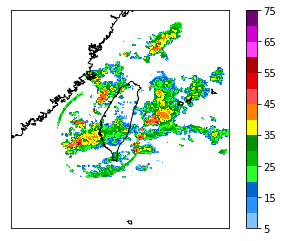

In [7]:
##Note that function "COMPREF_READ" can recognized both radar reflectivity and QPE data
compress_dat='DATA/RADAR/COMPREF.20220321.0000.gz'
out=IO.COMPREF_READ(compress_dat)
bm_twn.drawcoastlines()
bm_twn.contourf(out.lon,out.lat,out(),**out.cwbcolorbar(),latlon=True)
plt.colorbar()
print(out)

# Radar  QPE

unzip files
CWB QPE binary format([('', '<i2')])
TIME:Mon Mar 28 00:00:00 2022
DIMX,DIMY,DIMZ=441,561,1



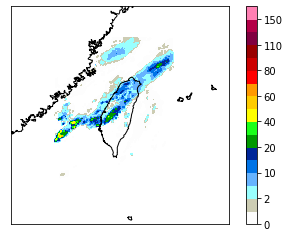

In [8]:
qpe_dat='DATA/qpe/CB_GC_PCP_1H_RAD.20220328.0000.gz'
out=IO.COMPREF_READ(qpe_dat)
bm_twn.drawcoastlines()
bm_twn.contourf(out.lon,out.lat,out(),**out.cwbcolorbar(),latlon=True)
plt.colorbar()
print(out)

# Numerical model data (DMSKEY)

In [9]:
def DMSXYDIM(WXX):
    ''' function for return xdim,ydim at once
        EX: xdim,ydim=DMSXYDIM("WF02")
    '''
    if WXX=='WD01': xdim,ydim=661,385
    if WXX=='WD02': xdim,ydim=1158,673
    if WXX=='WF02': xdim,ydim=263,303
    if WXX=='WE01': xdim,ydim=450,450
    return xdim,ydim

def DMSTAIL(WXX):
    ''' function for return tail of DMSKEY in string format
    '''
    domain2grid={"WD01":"0254485" ,"WD02":"0779334" ,"WF02":"0079689","WD03":"0729136","WE01":"0202500"}
    return domain2grid[WXX]

file_path='/IFS6/data2/datarfs/c164/test/2022032100000012/'
#### 20222032100 means model initial at 2022/03/21 00 UTC
#### 0000012 means forecast time is 12 hour
dms_lat = np.fromfile(file_path+'X00LATWD02H0779334',dtype='>d',count=-1,sep="") #LAT
dms_lon = np.fromfile(file_path+'X00LONWD02H0779334',dtype='>d',count=-1,sep="") #LON
dms_u = np.fromfile(file_path+'850200WD02H0779334',dtype='>d',count=-1,sep="")
dms_v = np.fromfile(file_path+'850210WD02H0779334',dtype='>d',count=-1,sep="")
dms_rh = np.fromfile(file_path+'850510WD02H0779334',dtype='>d',count=-1,sep="")
dms_t = np.fromfile(file_path+'850100WD02H0779334',dtype='>d',count=-1,sep="")
xdim,ydim=DMSXYDIM("WD02")
data_lat= np.float32(np.reshape(dms_lat, (xdim,ydim), order='F'))
data_lon= np.float32(np.reshape(dms_lon, (xdim,ydim), order='F'))
data_u= np.float32(np.reshape(dms_u, (xdim,ydim), order='F'))
data_v= np.float32(np.reshape(dms_v, (xdim,ydim), order='F'))
data_rh= np.float32(np.reshape(dms_rh, (xdim,ydim), order='F'))
data_t= np.float32(np.reshape(dms_t, (xdim,ydim), order='F'))

Text(0.5, 1.0, 'Numerical Model result of 12 hr forecast from 2022/3/21 00 UTC \n Temp vs. UV-wind at 850hPa')

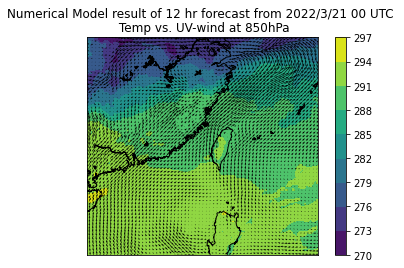

In [10]:
bm = Basemap(projection='tmerc',resolution='i', fix_aspect=True, llcrnrlon=110,
             llcrnrlat=15, urcrnrlon=130,urcrnrlat=32,lat_0=45,lon_0=120)
bm.drawcoastlines()
bm.contourf(data_lon,data_lat,data_t,latlon=True)
bm.quiver(data_lon[::10,::10],data_lat[::10,::10],data_u[::10,::10],data_v[::10,::10]
          ,scale=500,latlon=True)
plt.colorbar()
plt.title('Numerical Model result of 12 hr forecast from 2022/3/21 00 UTC \n Temp vs. UV-wind at 850hPa')

# Reference DMSKEY